In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import random

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.utils import shuffle

# 1. Preprocessing the data
## 1.1 Loading the data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

print(train_df.shape, test_df.shape)
train_df.head()

(26999, 10) (26999, 10)


,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-05-17 22:56:06.000000,27897490.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
1,2018-05-17 22:56:07.000000,27897450.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
2,2018-05-17 22:56:08.000000,27897360.0,19824230.0,125.6859,4059666.0,97.55283,NaN,NaN,NaN,0
3,2018-05-17 22:56:09.000000,27897430.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0
4,2018-05-17 22:56:10.000000,27897500.0,19824230.0,125.6859,4059666.0,97.55282,NaN,NaN,NaN,0


## 1.2. Droping NaN columns

In [3]:
train_df.dropna(axis=1, inplace=True)
test_df.dropna(axis=1, inplace=True)
print(train_df.shape, test_df.shape)
test_df.head()

(26999, 7) (26999, 7)


,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
0,2018-05-19 08:37:59.000000,29761980.0,21291990.0,126.0513,4067501.0,99.09749,0
1,2018-05-19 08:38:00.000000,29762120.0,21291990.0,126.0513,4067501.0,99.09749,0
2,2018-05-19 08:38:01.000000,29761980.0,21291990.0,126.0513,4067501.0,99.09749,0
3,2018-05-19 08:38:02.000000,29762120.0,21291990.0,126.0513,4067501.0,99.09749,0
4,2018-05-19 08:38:03.000000,29761980.0,21291990.0,126.0513,4067501.0,99.09749,0


## 1.3. Modifying the dataframe

In [4]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df = train_df.set_index('timestamp')

test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df = test_df.set_index('timestamp')

train_df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,,
2018-05-17 22:56:06,27897490.0,19824230.0,125.6859,4059666.0,97.55283,0
2018-05-17 22:56:07,27897450.0,19824230.0,125.6859,4059666.0,97.55283,0
2018-05-17 22:56:08,27897360.0,19824230.0,125.6859,4059666.0,97.55283,0
2018-05-17 22:56:09,27897430.0,19824230.0,125.6859,4059666.0,97.55282,0
2018-05-17 22:56:10,27897500.0,19824230.0,125.6859,4059666.0,97.55282,0


## 1.4. Splitting the dataframe for X, y

In [5]:
X_train_df = train_df[train_df.columns[:-1]]
y_train_df = train_df[train_df.columns[-1]]

X_test_df = test_df[test_df.columns[:-1]]
y_test_df = test_df[test_df.columns[-1]]

X_train_df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP
timestamp,,,,,
2018-05-17 22:56:06,27897490.0,19824230.0,125.6859,4059666.0,97.55283
2018-05-17 22:56:07,27897450.0,19824230.0,125.6859,4059666.0,97.55283
2018-05-17 22:56:08,27897360.0,19824230.0,125.6859,4059666.0,97.55283
2018-05-17 22:56:09,27897430.0,19824230.0,125.6859,4059666.0,97.55282
2018-05-17 22:56:10,27897500.0,19824230.0,125.6859,4059666.0,97.55282


## 1.5. Standardization

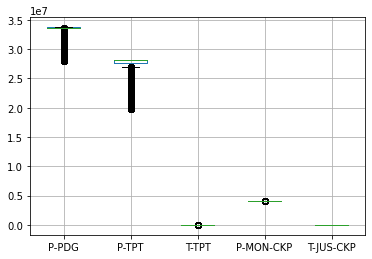

In [6]:
X_train_df.boxplot();

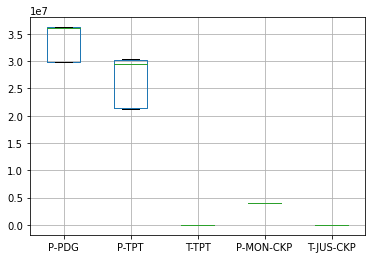

In [7]:
X_test_df.boxplot();

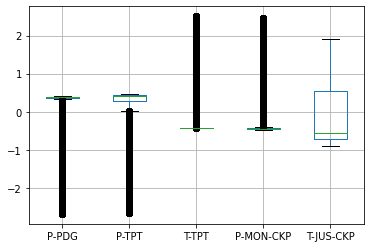

In [8]:
X_train_df = (X_train_df-X_train_df.mean()) / X_train_df.std()
X_test_df = (X_test_df-X_test_df.mean()) / X_test_df.std()
X_train_df.boxplot();

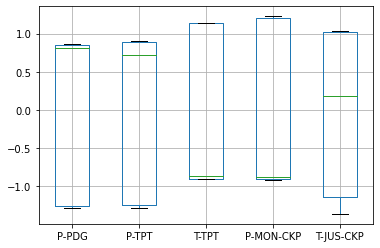

In [9]:
X_test_df.boxplot();

## 1.6. Regrouping the data for training/testing

In [10]:
def regroup(X, y, n_timestamp):
    X_regrouped = []
    y_regrouped = []
    
    for i in range(len(y)-n_timestamp+1):
        X_tmp = []
        for j in range(n_timestamp):
            X_tmp.append(X[i+j])
        X_regrouped.append(X_tmp)
        y_regrouped.append(y[i+n_timestamp-1])
    
    return np.array(X_regrouped), np.array(y_regrouped)

In [11]:
X_train, y_train = regroup(X_train_df.values, y_train_df.values, n_timestamp=25)
X_test, y_test = regroup(X_test_df.values, y_test_df.values, n_timestamp=25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26975, 25, 5) (26975,)
(26975, 25, 5) (26975,)


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.35, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(17533, 25, 5) (17533,)
(9442, 25, 5) (9442,)


## 1.7. One hot encoding the states

In [13]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform([[y] for y in y_train]).toarray()
y_valid = encoder.fit_transform([[y] for y in y_valid]).toarray()
y_test = encoder.fit_transform([[y] for y in y_test]).toarray()

---
# 2. Building the model

1. The CNN architecture contains a single 1D convolutional layer with 16 filters(size of 5) which is also an input layer with the shape of 25x5. There is a pooling layer(with the size of 2) after the convolution layer which helps to reduce the number of parameters. By adding the flatten layer we can connect the model output to the input of regular ANN. It has 2 dense layers and only 1 dropout layer(rate=5%). The first dense layer is for the input and the last one is for the final output of the model. That is why the last layer has 3 nodes(to represent one-hot encoded version of the system status). Overall, there are 3043 parameters all of which is trainable.

2. The optimizer that I am using is 'adam' optimizer since it is considered as a more efficient version of stochastic gradient descent algorithm; it is adaptive gradient algorithm(to maintain per-parameter learning rate) and it also benefits from RMSProp(to be efficient against to the noisy problems). The stratified splitting has been used for the training and validation data sets to preserve the proportion of system states in the given data set. By preserving the proportions, the predictions may be more realistic.

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.Conv1D(16, 5, activation='relu', input_shape=(25, 5)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.05))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 21, 16)            416       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2576      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 3,043
Trainable params: 3,043
Non-trainable params: 0
______________________________________________________

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, y_train, epochs=50, callbacks=[callback], 
                    validation_data=(X_valid, y_valid))

Epoch 1/50
548/548 [==============================] - 1s 1ms/step - loss: 0.1969 - accuracy: 0.9076 - val_loss: 0.1267 - val_accuracy: 0.9177
Epoch 2/50
548/548 [==============================] - 0s 886us/step - loss: 0.1287 - accuracy: 0.9333 - val_loss: 0.1139 - val_accuracy: 0.9557
Epoch 3/50
548/548 [==============================] - 0s 876us/step - loss: 0.1237 - accuracy: 0.9381 - val_loss: 0.1073 - val_accuracy: 0.9456
Epoch 4/50
548/548 [==============================] - 0s 893us/step - loss: 0.1196 - accuracy: 0.9403 - val_loss: 0.1057 - val_accuracy: 0.9457
Epoch 5/50
548/548 [==============================] - 0s 886us/step - loss: 0.1193 - accuracy: 0.9401 - val_loss: 0.1211 - val_accuracy: 0.9349
Epoch 6/50
548/548 [==============================] - 1s 942us/step - loss: 0.1197 - accuracy: 0.9391 - val_loss: 0.1130 - val_accuracy: 0.9413
Epoch 7/50
548/548 [==============================] - 1s 955us/step - loss: 0.1157 - accuracy: 0.9417 - val_loss: 0.1024 - val_accuracy: 0

In the training process, the training accuracy slightly increases with slight fluctuations as well as the validation accuracy. However, there is no (relatively) big changes in both accuracies and losses; both accuracies are about 94-95% and both losses are about 0.1.

## 2.1. Training & testing the model

In [16]:
X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test)
X_test_1000, y_test_1000 = X_test_shuffled[:1000], y_test_shuffled[:1000]

y_pred_1000 = model.predict(X_test_1000)
y_pred = model.predict(X_test)
confusion_mtx = sklearn.metrics.confusion_matrix(y_test_1000.argmax(axis=1), y_pred_1000.argmax(axis=1))

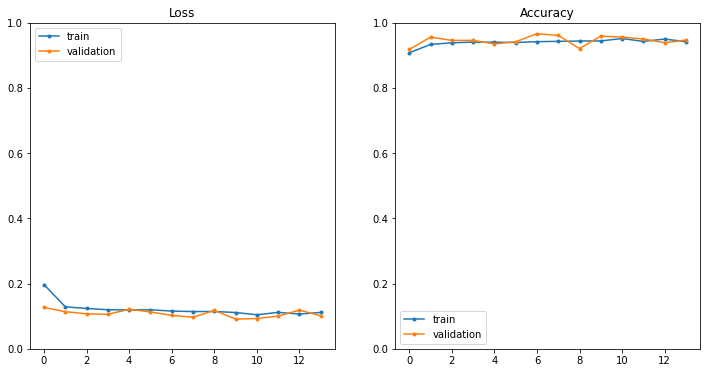

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].set_title('Loss')
axs[1].set_title('Accuracy')
axs[0].set_ylim((0, 1))
axs[1].set_ylim((0, 1))

axs[0].plot(history.history['loss'], '.-');
axs[0].plot(history.history['val_loss'], '.-');

axs[1].plot(history.history['accuracy'], '.-');
axs[1].plot(history.history['val_accuracy'], '.-');

axs[0].legend(['train', 'validation'], loc='upper left');
axs[1].legend(['train', 'validation'], loc='lower left');

Text(69.0, 0.5, 'Label')

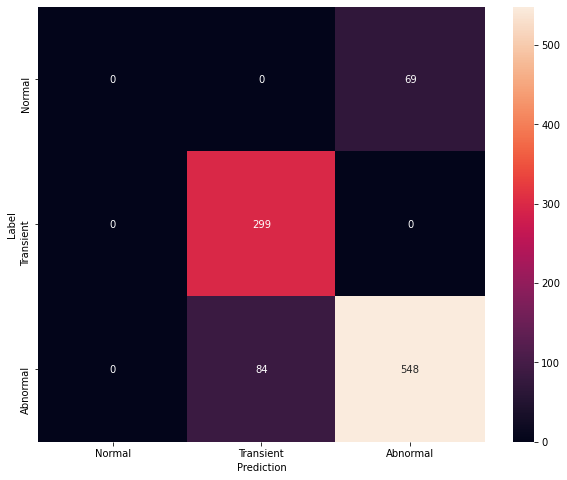

In [18]:
plt.figure(figsize=(10,8))
labels = ['Normal', 'Transient', 'Abnormal']
sb.heatmap(confusion_mtx,
           xticklabels=labels,
           yticklabels=labels,
           annot=True,
           fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')

Most of the time, the model has a tendency to misclassify the system state when it is running normally; it mostly classifies it as an abnormal state(not even transient for some reason). In the other hand, the model rarely missclassfies the system state when it is running abnormally; it predicts that the system runs normally(not even transient, again). So, the model cannot distinguish the normal and abnnormal states quite well; however, it predicts the abnormal state way better than the normal state.